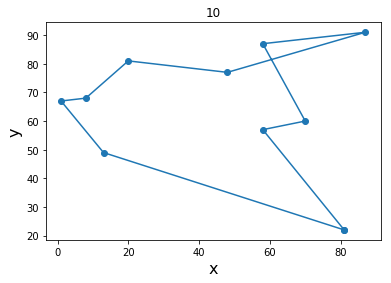

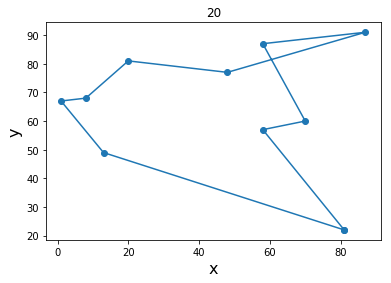

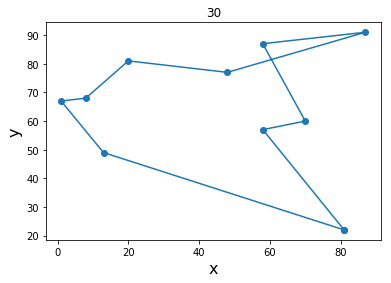

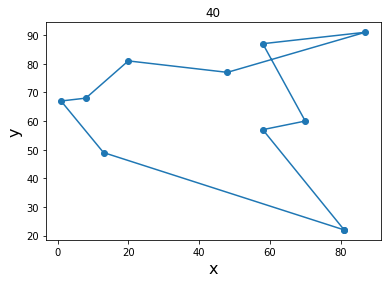

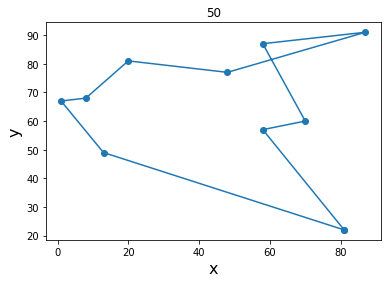

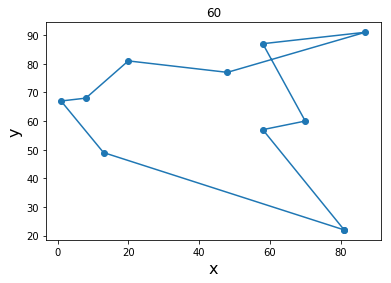

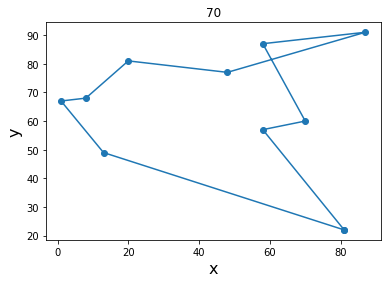

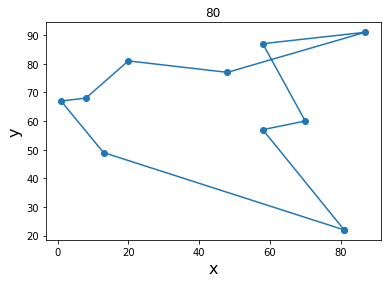

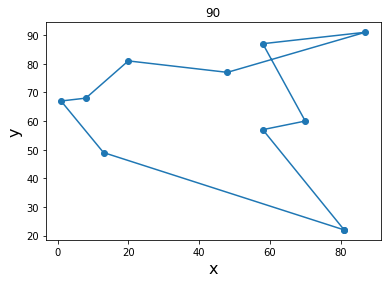

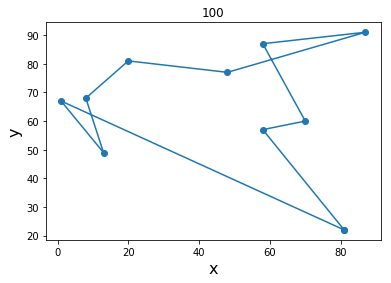

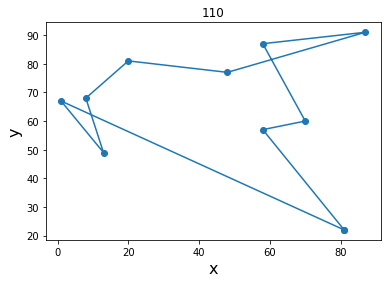

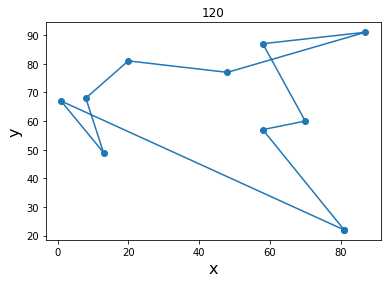

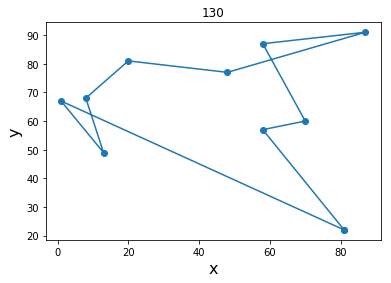

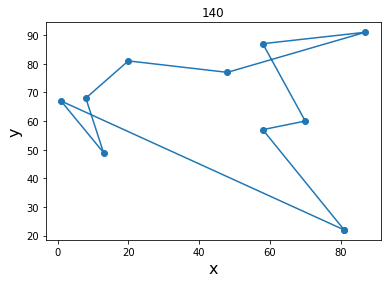

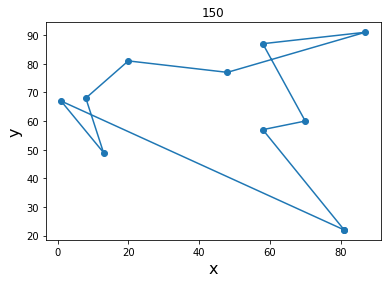

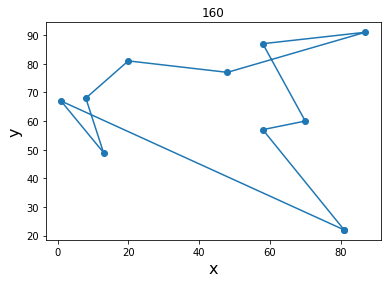

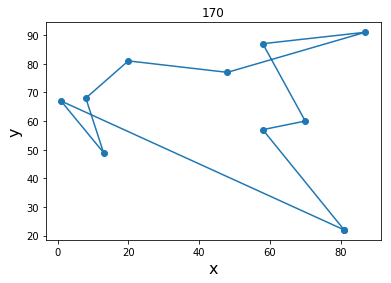

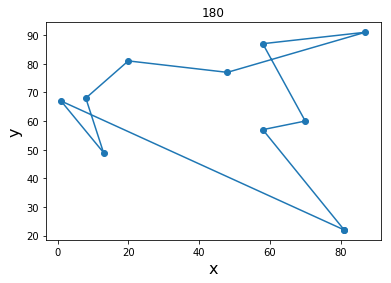

In [1]:
from itertools import permutations
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from itertools import combinations, permutations 
%matplotlib inline
def fitnessFunction(pop,num,city_num,x_position_add_end,y_position_add_end):
    '''适应度函数，计算每个排列的适应度，并保存到pop矩阵第二维的最后一项'''
    for x1 in range(num):
        square_sum = 0
        for x2 in range(city_num):
            square_sum += (x_position_add_end[int(pop[x1][x2])] - x_position_add_end[int(pop[x1][x2+1])])**2 + (y_position_add_end[int(pop[x1][x2])] - y_position_add_end[int(pop[x1][x2+1])])**2
        # print(round(1/np.sqrt(square_sum),7))
        pop[x1][-1] = round(1/np.sqrt(square_sum),7)
def choiceFuction(pop): 
    '''
    这里的做法：比如A当前种群中的最优解，B为经过交叉、变异后的最差解，把A作为最当前代中的最优解保存下来作为这一代的最优解，同时A也参与交叉
    和变异。经过交叉、变异后的最差解为B，那么我再用A替代B。
    :argument pop矩阵
    :return 本代适应度最低的个体的索引值和本代适应度最高的个体
    '''
    yield np.argmin(pop[:, -1])
    yield pop[np.argmax(pop[:, -1])]
def choice(pop,num,city_num,x_position_add_end,y_position_add_end,b):
    fitnessFunction(pop,num,city_num,x_position_add_end,y_position_add_end)
    c,d =choiceFuction(pop)
    # 上一代的最优值替代本代中的最差值
    pop[c] = b
    return pop
def drawPic(maxFitness,x_position,y_position,i):
    index = np.array(maxFitness[:-1],dtype=np.int32)
    x_position_add_end = np.append(x_position[index],x_position[[index[0]]])
    y_position_add_end = np.append(y_position[index],y_position[[index[0]]])
    fig = plt.figure()
    plt.plot(x_position_add_end,y_position_add_end,'-o')
    plt.xlabel('x',fontsize = 16)
    plt.ylabel('y',fontsize = 16)
    plt.title('{iter}'.format(iter=i))
def matuingFuction(pop,pc,city_num,pm,num):
    mating_matrix =np.array(1-(np.random.rand(num)>pc),dtype=np.bool)  # 交配矩阵，如果为true则进行交配
    a = list(pop[mating_matrix][:,:-1])# 进行交配的个体
    b = list(pop[np.array(1-mating_matrix,dtype=bool)][:,:-1]) # 未进行交配的个体,直接放到下一代
    b = [list(i) for i in b] # 对b进行类型转换，避免下面numpy.array 没有index属性
#     print(a)
    if len(a)%2 !=0:
        b.append(a.pop())
#     print('ab的长度：',len(a),len(b))
    for i in range(int(len(a)/2)):
        # 随机初始化两个交配点,这里写得不好，这边的两个点初始化都是一个在中间位置偏左，一个在中间位置偏右
        p1 = np.random.randint(1,int(city_num/2)+1)
        p2 = np.random.randint(int(city_num/2)+1,city_num)
        x1 = list(a.pop())
        x2 = list(a.pop())
        matuting(x1,x2,p1,p2)
        # 交配之后产生的个体进行一定概率上的变异
        variationFunction(x1,pm,city_num)
        variationFunction(x2,pm,city_num)
        b.append(x1)
        b.append(x2)
    zero = np.zeros((num,1))
#     print('b的形状：',len(b))
    temp = np.column_stack((b, zero))
    return temp
        
    
def matuting(x1,x2,p1,p2):
        # 以下进行交配
        # 左边交换位置
        temp = x1[:p1]
        x1[:p1] = x2[:p1]
        x2[:p1] = temp
        # 右边交换位置
        temp = x1[p2:]
        x1[p2:] = x2[p2:]
        x2[p2:] = temp
        # 寻找重复的元素
        center1 = x1[p1:p2]
        center2 = x2[p1:p2]
        while True: # x1左边
            for i in x1[:p1]:
                if i in center1:
                    # print(center1.index(i)) # 根据值找到索引
                    x1[x1[:p1].index(i)] = center2[center1.index(i)]
                    break
            if np.intersect1d(x1[:p1],center1).size == 0: # 如果不存在交集，则循环结束
                break
        while True: # x1右边
            for i in x1[p2:]:
                if i in center1:
                    # print(center1.index(i)) # 根据值找到索引
                    x1[x1[p2:].index(i) + p2] = center2[center1.index(i)]
                    # print(x1)
                    break
            if np.intersect1d(x1[p2:],center1).size == 0: # 如果不存在交集，则循环结束
                break
        while True: # x2左边
            for i in x2[:p1]:
                if i in center2:
#                     print(center2.index(i)) # 根据值找到索引
                    x2[x2[:p1].index(i)] = center1[center2.index(i)]
                    break
            if np.intersect1d(x2[:p1],center2).size == 0: # 如果不存在交集，则循环结束
                break
        while True: # x2右边
            for i in x2[p2:]:
                if i in center2:
                    # print(center2.index(i)) # 根据值找到索引
                    x2[x2[p2:].index(i) + p2] = center1[center2.index(i)]
                    # print(x2)
                    break
            if np.intersect1d(x2[p2:],center2).size == 0: # 如果不存在交集，则循环结束
                break   
               
def variationFunction(list_a,pm,city_num):
#    '''变异函数'''
    if np.random.rand() < pm:
        p1 = np.random.randint(1,int(city_num/2)+1)
        p2 = np.random.randint(int(city_num/2)+1,city_num)
#         print(p1,p2)
        temp = list_a[p1:p2]
        temp.reverse()
        list_a[p1:p2] = temp
#         print(list_a)
def main():
    # 初始化
    pop = [] # 存放访问顺序和每个个体适应度
    num = 250 # 初始化群体的数目
    city_num = 10 # 城市数目
    pc = 0.9 # 每个个体的交配概率
    pm = 0.2 # 每个个体的变异概率 
    x_position = np.random.randint(0,100,size=city_num)
    y_position = np.random.randint(0,100,size=city_num)
    x_position_add_end = np.append(x_position,x_position[0])
    y_position_add_end = np.append(y_position,y_position[0])
    for i in range(num):
        pop.append(np.random.permutation(np.arange(0,city_num))) # 假设有5个城市，初始群体的数目为60个
        # 初始化化一个60*1的拼接矩阵，值为0
    zero = np.zeros((num,1))
    pop = np.column_stack((pop, zero)) # 矩阵的拼接
    fitnessFunction(pop,num,city_num,x_position_add_end,y_position_add_end)
    for i in range(180):
        a,b = choiceFuction(pop) # a 为当代适应度最小的个体的索引，b为当代适应度最大的个体,这边要保留的是b
#         print('索引值和适应度最大的个体：',a,b)
    #     pop[a]=b
        if (i+1)%10==0:
            drawPic(b,x_position,y_position,i+1) # 根据本代中的适应度最大的个体画图
        pop_temp = matuingFuction(pop,pc,city_num,pm,num) #交配变异
        pop = choice(pop_temp,num,city_num,x_position_add_end,y_position_add_end,b)


main()

